<a href="https://colab.research.google.com/github/KholoudAlhamdan/Assignment_W5_2/blob/main/Assignment_W5_2theS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
!git clone https://github.com/sda-fintech-cohort1-section2/W5C2.git

Cloning into 'W5C2'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 8), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [166]:
%cd W5C2

/content/W5C2/W5C2/W5C2/W5C2/W5C2/W5C2/W5C2


In [167]:
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")


from ActMng import AccountManager

In [168]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [169]:
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


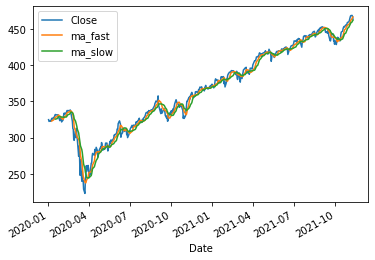

In [170]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].plot()


In [171]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-01-02,323.540009,324.869995,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN
2020-01-08,322.940002,324.450012,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0


In [172]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-02,323.540009,324.869995,NaN,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN,NaN
2020-01-08,322.940002,324.450012,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0,NaN
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0,NaN
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,NaN


In [173]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,Long
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None
...,...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0,None
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0,None
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None


In [174]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [175]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,Long,100059.295000,19999.591056,241.18,241.18,1.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None,99902.522112,19999.591056,241.18,0.00,0.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None,99912.171373,19999.591056,241.18,0.00,0.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None,100003.820950,19999.591056,241.18,0.00,0.0
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None,99292.337006,19999.591056,241.18,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0,None,135372.049262,25559.485500,235.19,0.00,0.0
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0,None,135753.055913,25559.485500,235.19,0.00,0.0
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None,135847.130478,25559.485500,235.19,0.00,0.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None,135482.588849,25559.485500,235.19,0.00,0.0


In [176]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-17,SPY,2020-01-17 00:00:00,At Market Open,BUY,MARKET,331.700012,241.18,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,241.18,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,241.66,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,241.66,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,235.86,1.0
...,...,...,...,...,...,...,...,...
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,222.78,1.0
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,222.82,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,222.82,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,235.19,1.0


Absolute_return_tf: %35.0
CAGR_tf: %18.0


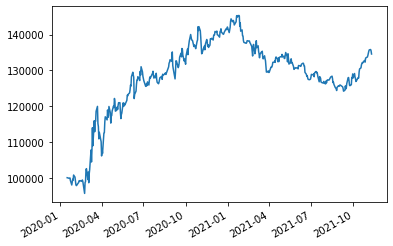

In [177]:
#Todo:

r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"Absolute_return_tf: %{np.round(absolute_return_tf,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: %{np.round(CAGR_tf,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()

Absolute_return_bh: %22.0
CAGR_bh: %11.0


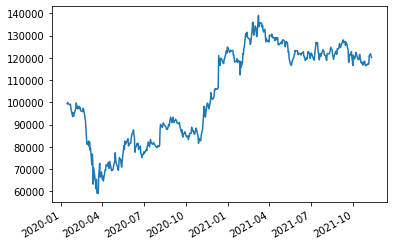

In [209]:
#Todo:

r_df = results['result_df']

# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
print(f"Absolute_return_bh: %{np.round(absolute_return_bh,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(252/len(r_df)))-1
print(f"CAGR_bh: %{np.round(CAGR_bh,2)*100}")


# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()


In [179]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol, dates and trend parameters changes the performance
# Can you beat the reference implementation?

In [180]:
starting_capital = 200000
allocation = 0.8

symbol = 'LCID'

long_trend_days = 12
short_trend_days = 3

In [181]:
def fetch_data(symbol:str='LCID', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


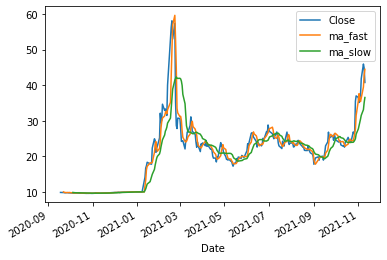

In [182]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].plot()

In [183]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-09-18,10.250000,9.890000,NaN,NaN,NaN
2020-09-21,9.900000,9.860000,NaN,NaN,NaN
2020-09-22,9.960000,9.880000,10.036667,NaN,NaN
2020-09-23,9.900000,9.850000,9.920000,NaN,NaN
2020-09-24,9.850000,9.770000,9.903333,NaN,NaN
...,...,...,...,...,...
2021-11-04,37.380001,37.119999,35.391666,30.455833,1.0
2021-11-05,37.500000,41.799999,36.370000,31.517500,1.0
2021-11-08,43.540001,45.919998,39.473334,33.120833,1.0


In [184]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-09-18,10.250000,9.890000,NaN,NaN,NaN,NaN
2020-09-21,9.900000,9.860000,NaN,NaN,NaN,NaN
2020-09-22,9.960000,9.880000,10.036667,NaN,NaN,NaN
2020-09-23,9.900000,9.850000,9.920000,NaN,NaN,NaN
2020-09-24,9.850000,9.770000,9.903333,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-04,37.380001,37.119999,35.391666,30.455833,1.0,NaN
2021-11-05,37.500000,41.799999,36.370000,31.517500,1.0,NaN
2021-11-08,43.540001,45.919998,39.473334,33.120833,1.0,NaN


In [185]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-10-05,9.800000,9.710000,9.793333,9.886667,-1.0,Short
2020-10-06,9.740000,9.680000,9.756667,9.844167,-1.0,None
2020-10-07,9.720000,9.710000,9.753333,9.829167,-1.0,None
2020-10-08,9.700000,9.717000,9.720000,9.807500,-1.0,None
2020-10-09,9.760000,9.750000,9.726667,9.795833,-1.0,None
...,...,...,...,...,...,...
2021-11-04,37.380001,37.119999,35.391666,30.455833,1.0,None
2021-11-05,37.500000,41.799999,36.370000,31.517500,1.0,None
2021-11-08,43.540001,45.919998,39.473334,33.120833,1.0,None


In [186]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [187]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-10-05,9.800000,9.710000,9.793333,9.886667,-1.0,Short,201468.390191,359998.997114,-16326.53,-16326.53,1.0
2020-10-06,9.740000,9.680000,9.756667,9.844167,-1.0,None,201958.181732,359998.997114,-16326.53,0.00,0.0
2020-10-07,9.720000,9.710000,9.753333,9.829167,-1.0,None,201468.390191,359998.997114,-16326.53,0.00,0.0
2020-10-08,9.700000,9.717000,9.720000,9.807500,-1.0,None,201354.104979,359998.997114,-16326.53,0.00,0.0
2020-10-09,9.760000,9.750000,9.726667,9.795833,-1.0,None,200815.329614,359998.997114,-16326.53,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,37.380001,37.119999,35.391666,30.455833,1.0,None,180821.240620,26422.089863,4159.46,0.00,0.0
2021-11-05,37.500000,41.799999,36.370000,31.517500,1.0,None,200287.514689,26422.089863,4159.46,0.00,0.0
2021-11-08,43.540001,45.919998,39.473334,33.120833,1.0,None,217424.485446,26422.089863,4159.46,0.00,0.0
2021-11-09,47.480000,44.779999,42.840000,35.075000,1.0,None,212682.703585,26422.089863,4159.46,0.00,0.0


In [188]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-10-05,LCID,2020-10-05 00:00:00,At Market Open,SELL,MARKET,9.800000,16326.53,1.0
2020-10-13,LCID,2020-10-13 00:00:00,At Market Open,BUY,MARKET,9.850000,16326.53,1.0
2020-10-13,LCID,2020-10-13 00:00:00,At Market Open,BUY,MARKET,9.850000,16177.19,1.0
2020-10-15,LCID,2020-10-15 00:00:00,At Market Open,SELL,MARKET,9.670000,16177.19,1.0
2020-10-15,LCID,2020-10-15 00:00:00,At Market Open,SELL,MARKET,9.670000,16237.25,1.0
2020-10-30,LCID,2020-10-30 00:00:00,At Market Open,BUY,MARKET,9.650000,16237.25,1.0
2020-10-30,LCID,2020-10-30 00:00:00,At Market Open,BUY,MARKET,9.650000,16297.66,1.0
2020-11-02,LCID,2020-11-02 00:00:00,At Market Open,SELL,MARKET,9.630000,16297.66,1.0
2020-11-02,LCID,2020-11-02 00:00:00,At Market Open,SELL,MARKET,9.630000,16304.26,1.0
2020-11-05,LCID,2020-11-05 00:00:00,At Market Open,BUY,MARKET,9.760000,16304.26,1.0


Absolute_return_tf: %-2.0
CAGR_tf: %-2.0


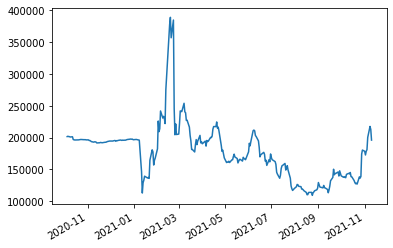

In [189]:


r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"Absolute_return_tf: %{np.round(absolute_return_tf,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: %{np.round(CAGR_tf,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()

Absolute_return_bh: %22.0
CAGR_bh: %11.0


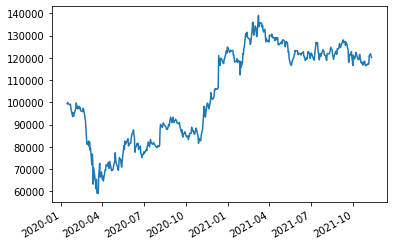

In [210]:
r_df = results['result_df']

# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
print(f"Absolute_return_bh: %{np.round(absolute_return_bh,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(252/len(r_df)))-1
print(f"CAGR_bh: %{np.round(CAGR_bh,2)*100}")


# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()


In [191]:
starting_capital = 100000
allocation = 0.7

symbol = 'DIS'

long_trend_days = 9
short_trend_days = 3


In [192]:
def fetch_data(symbol:str='DIS', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


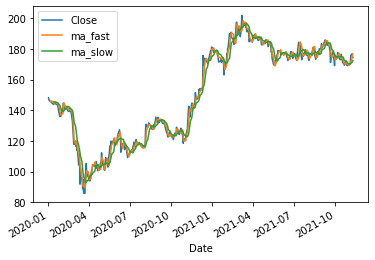

In [193]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].plot()

In [194]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-01-02,145.289993,148.199997,NaN,NaN,NaN
2020-01-03,146.399994,146.500000,NaN,NaN,NaN
2020-01-06,145.539993,145.649994,145.743327,NaN,NaN
2020-01-07,145.990005,145.699997,145.976664,NaN,NaN
2020-01-08,145.490005,145.399994,145.673335,NaN,NaN
...,...,...,...,...,...
2021-11-04,170.029999,170.279999,169.919998,170.232222,-1.0
2021-11-05,173.500000,175.630005,171.076665,170.632222,1.0
2021-11-08,178.690002,176.869995,174.073334,171.270001,1.0


In [195]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-02,145.289993,148.199997,NaN,NaN,NaN,NaN
2020-01-03,146.399994,146.500000,NaN,NaN,NaN,NaN
2020-01-06,145.539993,145.649994,145.743327,NaN,NaN,NaN
2020-01-07,145.990005,145.699997,145.976664,NaN,NaN,NaN
2020-01-08,145.490005,145.399994,145.673335,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-04,170.029999,170.279999,169.919998,170.232222,-1.0,NaN
2021-11-05,173.500000,175.630005,171.076665,170.632222,1.0,Long
2021-11-08,178.690002,176.869995,174.073334,171.270001,1.0,NaN


In [196]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-14,143.410004,145.199997,144.486669,145.404444,-1.0,Short
2020-01-15,145.710007,144.320007,144.623337,145.451113,-1.0,None
2020-01-16,145.089996,145.119995,144.736669,145.305557,-1.0,None
2020-01-17,145.539993,144.330002,145.446665,145.305557,1.0,Long
2020-01-21,144.240005,143.559998,144.956665,145.111113,-1.0,Short
...,...,...,...,...,...,...
2021-11-04,170.029999,170.279999,169.919998,170.232222,-1.0,None
2021-11-05,173.500000,175.630005,171.076665,170.632222,1.0,Long
2021-11-08,178.690002,176.869995,174.073334,171.270001,1.0,None


In [197]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [198]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-14,143.410004,145.199997,144.486669,145.404444,-1.0,Short,99125.286377,169998.856888,-488.11,-488.11,1.0
2020-01-15,145.710007,144.320007,144.623337,145.451113,-1.0,None,99554.818112,169998.856888,-488.11,0.00,0.0
2020-01-16,145.089996,145.119995,144.736669,145.305557,-1.0,None,99164.336071,169998.856888,-488.11,0.00,0.0
2020-01-17,145.539993,144.330002,145.446665,145.305557,1.0,Long,98381.423232,29686.115560,475.96,964.07,2.0
2020-01-21,144.240005,143.559998,144.956665,145.111113,-1.0,Short,98661.108761,167172.246396,-477.23,-953.19,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,170.029999,170.279999,169.919998,170.232222,-1.0,None,71283.124069,121817.119307,-296.77,0.00,0.0
2021-11-05,173.500000,175.630005,171.076665,170.632222,1.0,Long,70929.891892,21096.634307,283.74,580.51,2.0
2021-11-08,178.690002,176.869995,174.073334,171.270001,1.0,None,71281.726721,21096.634307,283.74,0.00,0.0
2021-11-09,176.949997,175.110001,176.380000,171.845556,1.0,None,70782.345880,21096.634307,283.74,0.00,0.0


In [199]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-14,DIS,2020-01-14 00:00:00,At Market Open,SELL,MARKET,143.410004,488.11,1.0
2020-01-17,DIS,2020-01-17 00:00:00,At Market Open,BUY,MARKET,145.539993,488.11,1.0
2020-01-17,DIS,2020-01-17 00:00:00,At Market Open,BUY,MARKET,145.539993,475.96,1.0
2020-01-21,DIS,2020-01-21 00:00:00,At Market Open,SELL,MARKET,144.240005,475.96,1.0
2020-01-21,DIS,2020-01-21 00:00:00,At Market Open,SELL,MARKET,144.240005,477.23,1.0
...,...,...,...,...,...,...,...,...
2021-10-29,DIS,2021-10-29 00:00:00,At Market Open,SELL,MARKET,169.020004,296.54,1.0
2021-10-29,DIS,2021-10-29 00:00:00,At Market Open,SELL,MARKET,169.020004,296.77,1.0
2021-11-05,DIS,2021-11-05 00:00:00,At Market Open,BUY,MARKET,173.500000,296.77,1.0
2021-11-05,DIS,2021-11-05 00:00:00,At Market Open,BUY,MARKET,173.500000,283.74,1.0


Absolute_return_tf: %-28.999999999999996
CAGR_tf: %-17.0


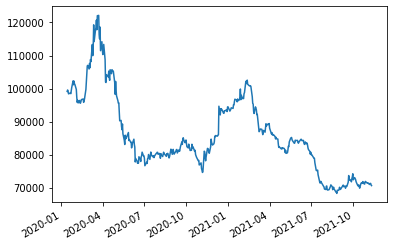

In [200]:
r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"Absolute_return_tf: %{np.round(absolute_return_tf,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: %{np.round(CAGR_tf,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()

Absolute_return_bh: %22.0
CAGR_bh: %11.0


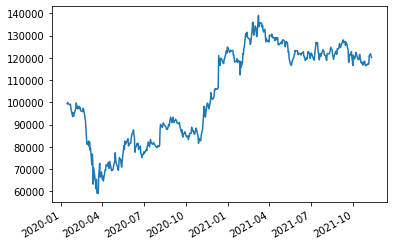

In [211]:
r_df = results['result_df']

# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
print(f"Absolute_return_bh: %{np.round(absolute_return_bh,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(252/len(r_df)))-1
print(f"CAGR_bh: %{np.round(CAGR_bh,2)*100}")


# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252)**0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()
